In [1]:
import os
import pickle
from matplotlib import pyplot as plt
import numpy as np

results_path = os.path.join('.', 'results')

['train_majority_loss', 'train_minority_loss', 'train_majority_accuracy', 'train_minority_accuracy', 'test_majority_loss', 'test_minority_loss', 'test_majority_accuracy', 'test_minority_accuracy', 'train_majority_weights_mean', 'train_minority_weights_mean', 'train_majority_nonzero_samples', 'train_minority_nonzero_samples']


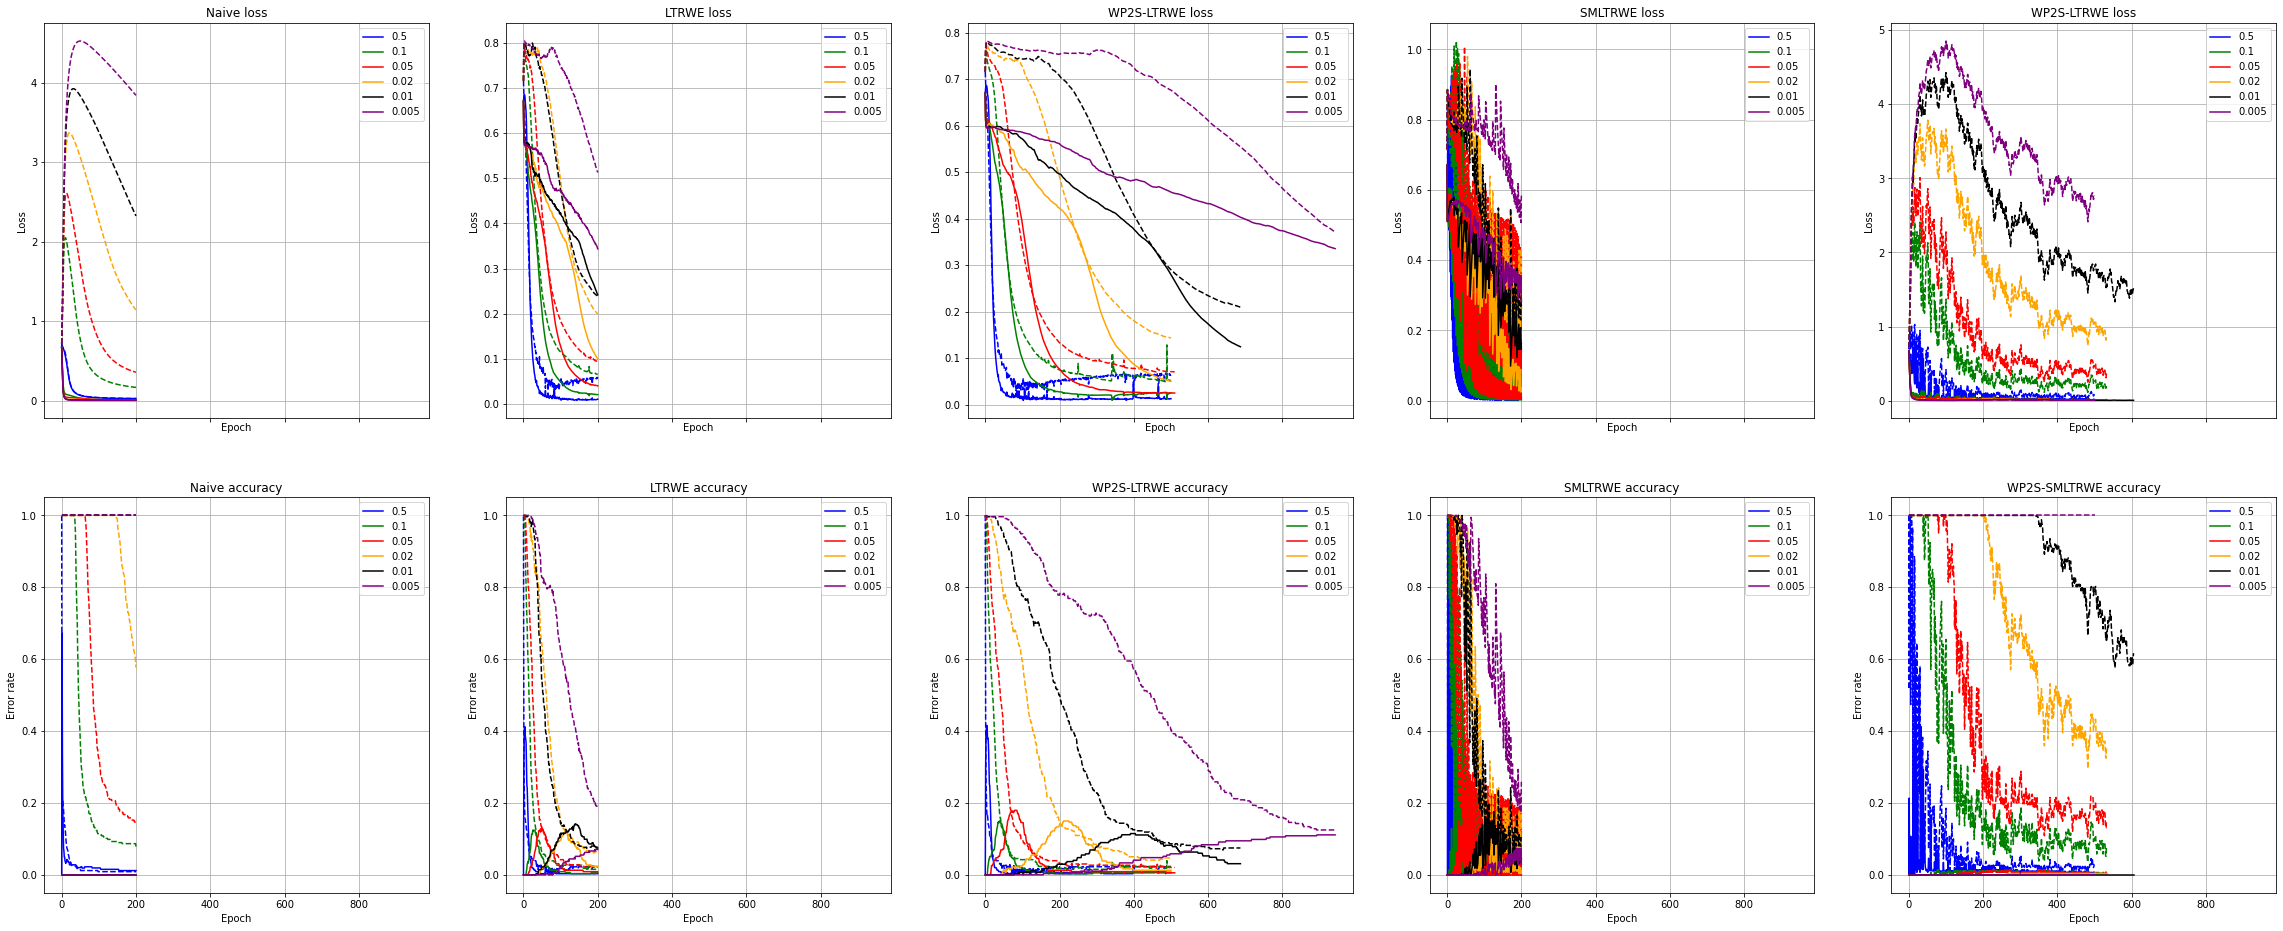

In [2]:
naive_results = []
ltrwe_results = []
smltrwe_results = []
wp2s_ltrwe_results = []
wp2s_smltrwe_results = []
for idx in range(6):
    with open(os.path.join(results_path, 'imbalanced_dataset_trial', 'results_MNIST_naive_{}.pickle'.format(idx)), 'rb') as F:
        naive_results.append(pickle.load(F))
    with open(os.path.join(results_path, 'imbalanced_dataset_trial', 'results_MNIST_ltrwe_{}.pickle'.format(idx)), 'rb') as F:
        ltrwe_results.append(pickle.load(F))
    with open(os.path.join(results_path, 'imbalanced_dataset_trial', 'results_MNIST_smltrwe_{}.pickle'.format(idx)), 'rb') as F:
        smltrwe_results.append(pickle.load(F))
    with open(os.path.join(results_path, 'imbalanced_dataset_trial_wp2s', 'results_MNIST_ltrwe_{}.pickle'.format(idx)), 'rb') as F:
        wp2s_ltrwe_results.append(pickle.load(F))
    with open(os.path.join(results_path, 'imbalanced_dataset_trial_wp2s', 'results_MNIST_smltrwe_{}.pickle'.format(idx)), 'rb') as F:
        wp2s_smltrwe_results.append(pickle.load(F))
print([k for k in ltrwe_results[0].keys()])

def plot_performance_over_time(dicts, probs, colors, col):
    for (results_dict, p, c) in zip(dicts, probs, colors):
        x, y = results_dict['test_majority_loss']
        ax[0][col].plot(x, y, '-', color=c, label='{}'.format(p))
        x, y = results_dict['test_minority_loss']
        ax[0][col].plot(x, y, '--', color=c)
        x, y = results_dict['test_majority_accuracy']
        ax[1][col].plot(x, 1-y, '-', color=c, label='{}'.format(p))
        x, y = results_dict['test_minority_accuracy']
        ax[1][col].plot(x, 1-y, '--', color=c)
        ax[0][col].legend()
        ax[1][col].legend()
        ax[0][col].set_xlabel('Epoch')
        ax[1][col].set_xlabel('Epoch')
        ax[0][col].set_ylabel('Loss')
        ax[1][col].set_ylabel('Error rate')
        ax[0][col].grid(True)
        ax[1][col].grid(True)

(fig, ax) = plt.subplots(2, 5, figsize=(40, 16), sharex=True)
ax[0][0].set_title('Naive loss')
ax[0][1].set_title('LTRWE loss')
ax[0][2].set_title('WP2S-LTRWE loss')
ax[0][3].set_title('SMLTRWE loss')
ax[0][4].set_title('WP2S-LTRWE loss')
ax[1][0].set_title('Naive accuracy')
ax[1][1].set_title('LTRWE accuracy')
ax[1][2].set_title('WP2S-LTRWE accuracy')
ax[1][3].set_title('SMLTRWE accuracy')
ax[1][4].set_title('WP2S-SMLTRWE accuracy')
probs = [.5, .1, .05, .02, .01, .005]
colors = ['blue', 'green', 'red', 'orange', 'black', 'purple']
plot_performance_over_time(naive_results, probs, colors, 0)
plot_performance_over_time(ltrwe_results, probs, colors, 1)
plot_performance_over_time(wp2s_ltrwe_results, probs, colors, 2)
plot_performance_over_time(smltrwe_results, probs, colors, 3)
plot_performance_over_time(wp2s_smltrwe_results, probs, colors, 4)

Text(0.5, 1.0, 'WP2S-SMLTRWE')

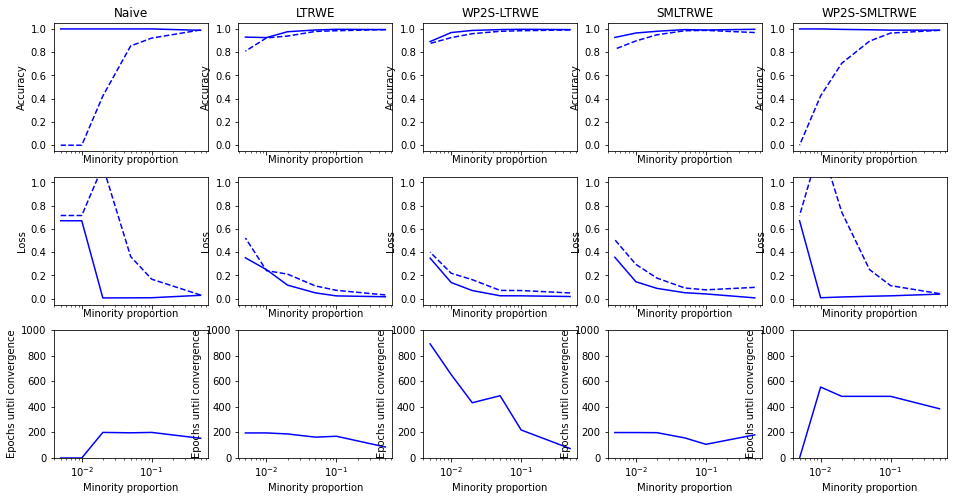

In [5]:
(fig, ax) = plt.subplots(3, 5, figsize=(16, 8), sharex=True)
def plot_final_performance(dicts, probs, col):
    epochs = []
    majority_accuracy = []
    minority_accuracy = []
    majority_loss = []
    minority_loss = []
    for d in dicts:
        x, y_min = d['test_minority_accuracy']
        _, y_maj = d['test_majority_accuracy']
        idx = np.argmax(y_min+y_maj)
        epochs.append(x[idx])
        majority_accuracy.append(d['test_majority_accuracy'][1][idx])
        minority_accuracy.append(d['test_minority_accuracy'][1][idx])
        majority_loss.append(d['test_majority_loss'][1][idx])
        minority_loss.append(d['test_minority_loss'][1][idx])
    ax[0][col].plot(probs, majority_accuracy, linestyle='-', color='blue')
    ax[0][col].plot(probs, minority_accuracy, linestyle='--', color='blue')
    ax[1][col].plot(probs, majority_loss, linestyle='-', color='blue')
    ax[1][col].plot(probs, minority_loss, linestyle='--', color='blue')
    ax[2][col].plot(probs, epochs, linestyle='-', color='blue')
    ax[0][col].set_xlabel('Minority proportion')
    ax[1][col].set_xlabel('Minority proportion')
    ax[2][col].set_xlabel('Minority proportion')
    ax[0][col].set_ylabel('Accuracy')
    ax[1][col].set_ylabel('Loss')
    ax[2][col].set_ylabel('Epochs until convergence')
    ax[0][col].set_xscale('log')
    ax[1][col].set_xscale('log')
    ax[2][col].set_xscale('log')
    ax[0][col].set_ylim(-.05, 1.05)
    ax[1][col].set_ylim(-.05, 1.05)
    ax[2][col].set_ylim(0, 1000)
plot_final_performance(naive_results, probs, 0)
plot_final_performance(ltrwe_results, probs, 1)
plot_final_performance(wp2s_ltrwe_results, probs, 2)
plot_final_performance(smltrwe_results, probs, 3)
plot_final_performance(wp2s_smltrwe_results, probs, 4)
ax[0][0].set_title('Naive')
ax[0][1].set_title('LTRWE')
ax[0][2].set_title('WP2S-LTRWE')
ax[0][3].set_title('SMLTRWE')
ax[0][4].set_title('WP2S-SMLTRWE')

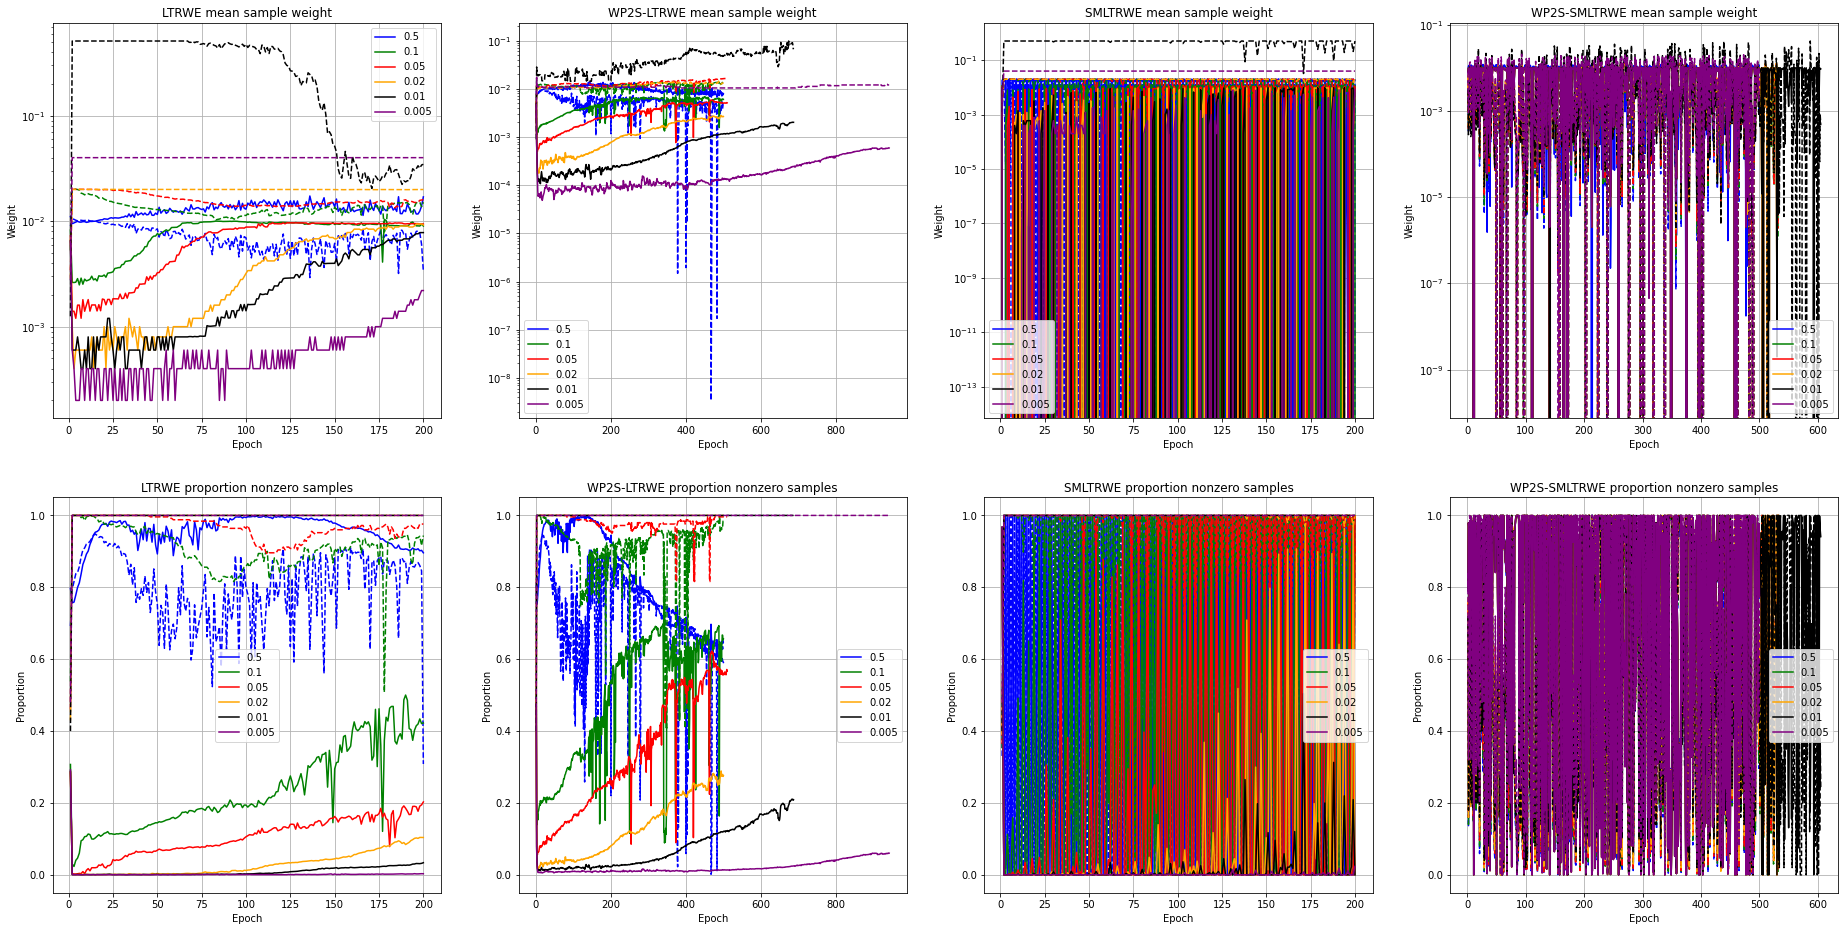

In [4]:
(fig, ax) = plt.subplots(2, 4, figsize=(32, 16))
ax[0][0].set_title('LTRWE mean sample weight')
ax[0][1].set_title('WP2S-LTRWE mean sample weight')
ax[0][2].set_title('SMLTRWE mean sample weight')
ax[0][3].set_title('WP2S-SMLTRWE mean sample weight')
ax[1][0].set_title('LTRWE proportion nonzero samples')
ax[1][1].set_title('WP2S-LTRWE proportion nonzero samples')
ax[1][2].set_title('SMLTRWE proportion nonzero samples')
ax[1][3].set_title('WP2S-SMLTRWE proportion nonzero samples')

def plot_weight_over_time(dicts, probs, colors, col):
    for (results_dict, p, c) in zip(dicts, probs, colors):
        x, y = results_dict['train_majority_weights_mean']
        ax[0][col].plot(x, y, '-', color=c, label='{}'.format(p))
        x, y = results_dict['train_minority_weights_mean']
        ax[0][col].plot(x, y, '--', color=c)
        ax[0][col].legend()
        ax[0][col].set_yscale('log')
        ax[0][col].set_xlabel('Epoch')
        ax[0][col].set_ylabel('Weight')
        ax[0][col].grid(True)

def plot_count_over_time(dicts, probs, colors, col):
    for (results_dict, p, c) in zip(dicts, probs, colors):
        x, y = results_dict['train_majority_nonzero_samples']
        y = y.astype(float)
        y /= 5000*(1-p)
        ax[1][col].plot(x, y, '-', color=c, label='{}'.format(p))
        x, y = results_dict['train_minority_nonzero_samples']
        y = y.astype(float)
        y /= 5000*p
        ax[1][col].plot(x, y, '--', color=c)
        ax[1][col].set_ylim(-.05, 1.05)
        ax[1][col].legend()
        ax[1][col].set_xlabel('Epoch')
        ax[1][col].set_ylabel('Proportion')
        ax[1][col].grid(True)

plot_weight_over_time(ltrwe_results, probs, colors, 0)
plot_count_over_time(ltrwe_results, probs, colors, 0)
plot_weight_over_time(wp2s_ltrwe_results, probs, colors, 1)
plot_count_over_time(wp2s_ltrwe_results, probs, colors, 1)
plot_weight_over_time(smltrwe_results, probs, colors, 2)
plot_count_over_time(smltrwe_results, probs, colors, 2)
plot_weight_over_time(wp2s_smltrwe_results, probs, colors, 3)
plot_count_over_time(wp2s_smltrwe_results, probs, colors, 3)